# Scraping

### Setups and configulations

In [9]:
import os
import sys
import re
import requests
from bs4 import BeautifulSoup
import pickle
sys.path.append('../')
import confana
#from common import *

### Execute scraping

In [16]:
# configurations
param = confana.set_param('https://aclanthology.org/volumes/', 'ACL', 2021, 2024, 1, 1)
paper_type = {'long':True,'short':True,'findings':False}


loading ./cache/ACL/summary_longpaper2021...
	31 Japanese authors out of all 2754 authors
	18 Japanese related papers out of all 571 papers
loading ./cache/ACL/summary_shortpaper2021...
	16 Japanese authors out of all 549 authors
	7 Japanese related papers out of all 139 papers
loading ./cache/ACL/summary_longpaper2022...
	35 Japanese authors out of all 2880 authors
	23 Japanese related papers out of all 603 papers
loading ./cache/ACL/summary_shortpaper2022...
	4 Japanese authors out of all 373 authors
	2 Japanese related papers out of all 97 papers
loading ./cache/ACL/summary_longpaper2023...
	44 Japanese authors out of all 4860 authors
	26 Japanese related papers out of all 911 papers
loading ./cache/ACL/summary_shortpaper2023...
	19 Japanese authors out of all 719 authors
	8 Japanese related papers out of all 164 papers
loading ./cache/ACL/summary_longpaper2024...
	30 Japanese authors out of all 5206 authors
	16 Japanese related papers out of all 864 papers
loading ./cache/ACL/summa

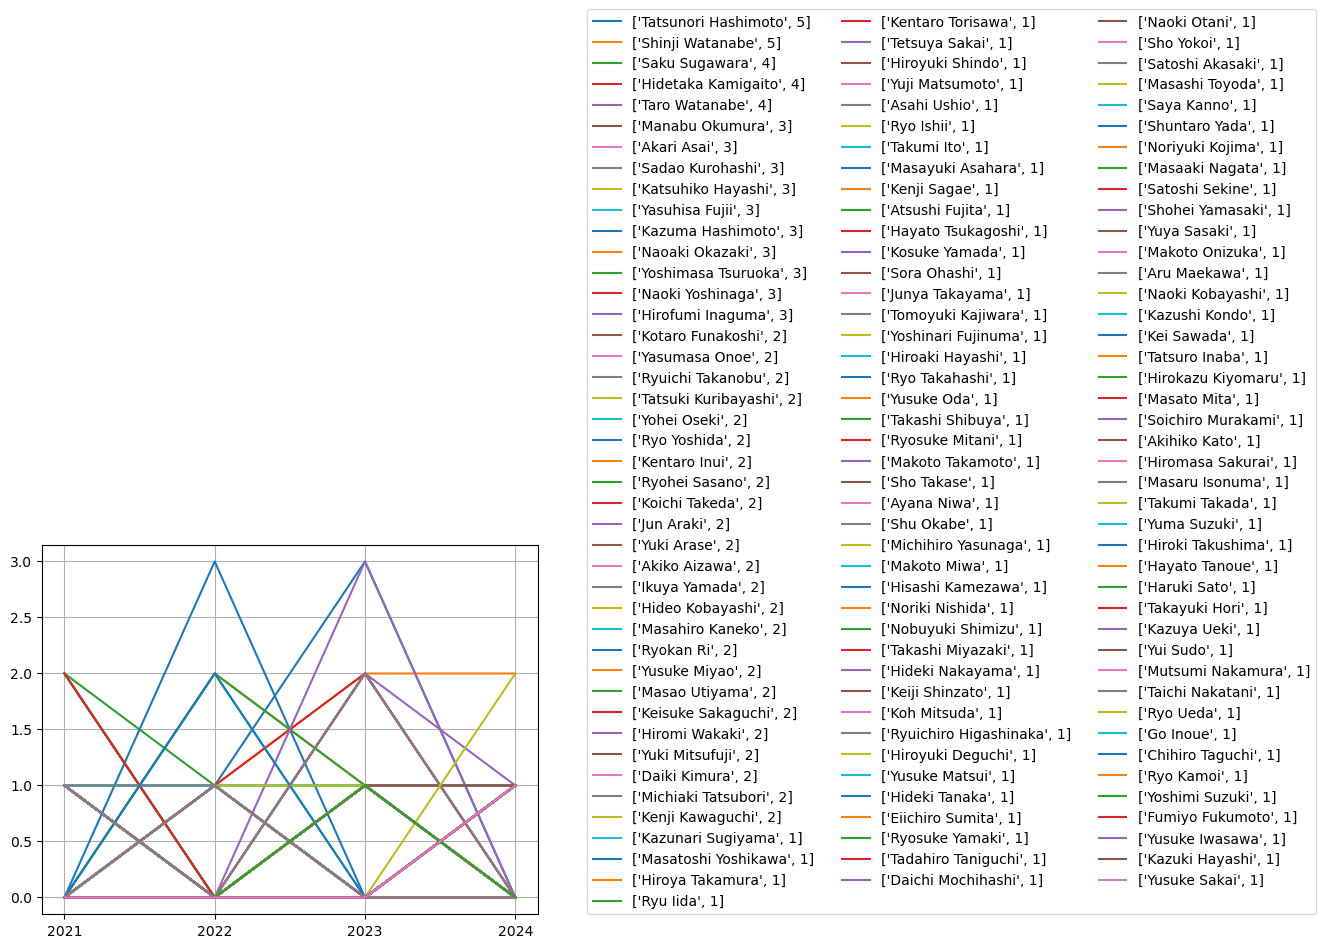

In [15]:
histall = {}

for year in range(param.yearFrom, param.yearTo, param.interval):
    yr = str(year)
    for type in paper_type.keys():
        if not paper_type[type]:
            break
        if type == 'long':
            pklfl = param.cachedir + '/' + 'summary_longpaper' + yr
        elif type == 'short':
            pklfl = param.cachedir + '/' + 'summary_shortpaper' + yr
        elif type == 'findings':
            pklfl = param.cachedir + '/' + 'summary_findings' + yr
        else:
            print('error')
            break

        if os.path.exists(pklfl):
            with open(pklfl,'rb') as f:
                authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)
                print(f'loading {pklfl}...')
            print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
            print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
        else:
            conf = param.conf_prefix + yr
            print(conf,'...')

            if type == 'long':
                url = param.site + yr +'.acl-long/'
            elif type == 'short':
                url = param.site + yr +'.acl-short/'
            elif type == 'findings':
                url = param.site + yr +'.findings-acl/'
            else: 
                print('error')

            pu = confana.parseUrl(param,yr)
            normal, authorss, titles = pu.parseACL(url)
            if normal < 0: 
                print('parsing failed...')

            pAT = confana.parseATlist(titles, authorss)
            jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pAT.selectJP()
            hist = pAT.makehist(jpauthors,yr)

            with open(pklfl, 'wb') as f:
                pickle.dump((authorss,titles,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper), f)

            print(f'\t{numjpauthors} Japanese authors out of all {numallauthors} authors')
            print(f'\t{numjppaper} Japanese related papers out of all {numpapers} papers')
        #print(jpauthors)
        #for ii in range(0,len(jpauthors)):
        #    print(f'{jpauthors[ii]}\t{jptitles[ii]}')
        pAT = confana.parseATlist(titles, authorss)
        histall = pAT.mergehist(histall,hist,yr)

ph = confana.parseHist(param,histall)
ph.plotsorted()

### KW trend

In [23]:
import pickle
import re

for year in range(2021,2025,1):
    yr = str(year)
    print("----")
    print(yr)
    titles = []
    for type in paper_type.keys():
        if not paper_type[type]:
            break
        if type == 'long':
            pklfl = param.cachedir + '/' + 'summary_longpaper' + yr
        elif type == 'short':
            pklfl = param.cachedir + '/' + 'summary_shortpaper' + yr
        elif type == 'findings':
            pklfl = param.cachedir + '/' + 'summary_findings' + yr
        else:
            print('error')
            break
        with open(pklfl , 'rb' ) as f:
            authorss,title,hist,jpauthors, jptitles, numallauthors, numjpauthors, numpapers, numjppaper = pickle.load(f)
            titles += title

    numpaper = len(titles)
    print(f'total number of papers: {numpaper}.')
    pt = confana.parseTitle(titles)
    stwordhist = pt.wordfreq()
        
    for item in stwordhist:
        ratio = item[1]/numpaper
        if ratio > 0.005:
            #print("{0:}\t{1:}\t{2:.5f}".format(item[0],item[1],ratio))
            print("{0:}\t{1:.5f}".format(item[0],ratio))
            #print("{0:}: {1:}".format(item[0],item[1]))


----
2021
total number of papers: 710.
translation	0.08310
generation	0.07606
language model	0.07324
graph	0.06761
learning	0.06620
detection	0.04789
transformer	0.04789
question answer	0.04507
representation	0.04225
recognition	0.03803
dataset	0.03662
embedding	0.03521
attention	0.03380
training	0.03239
classification	0.02958
modeling	0.02817
reasoning	0.02817
unsupervised	0.02676
parsing	0.02535
pre training	0.02394
adversarial	0.02254
prediction	0.02113
label	0.01972
benchmark	0.01831
few shot	0.01831
retrieval	0.01690
verification	0.01408
contrastive learning	0.01408
alignment	0.01408
zero shot	0.01408
fine tuning	0.01268
generative	0.01268
end to end	0.01127
generalization	0.01127
search	0.01127
interaction	0.00986
attack	0.00986
reading	0.00986
transfer	0.00845
knowledge distillation	0.00845
feature	0.00845
variation	0.00845
video	0.00845
correction	0.00845
space	0.00704
captioning	0.00704
meta learning	0.00704
matching	0.00704
weakly supervised	0.00704
resolution	0.00704
transfe

In [ ]:
import time
import requests


_url = "https://ieeexplore.ieee.org/xpl/conhome/10341341/proceeding?isnumber=10341342&sortType=vol-only-seq&rowsPerPage=100&pageNumber="
for i in range(1,100):
    __url = f"{_url}{i+1}"
    print(f"requesting {__url}")
    time.sleep(5)
    try:
        response = requests.get(__url)
        response.raise_for_status()
    except requests.RequestException as e:
        print(e)
    
